<a href="https://colab.research.google.com/github/earo12/Analyzing-Screen-Time/blob/main/Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

First we have to read the csv file

In [36]:
df = pd.read_csv('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


Let's check if there are some missing values

In [37]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [38]:
df.shape

(1000, 10)

Here we have two options, drop the missing values or fill them with a method, since we only have 1000 rows we shouldn't use the drop values. So I'll use the second one, to be more specific, I'll use the bfill method in order to fill them with the next non-missing value.

In [39]:
df.fillna(method = 'bfill', inplace = True)
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,little,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,little,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


Let's explore the data, in order to find out what kind of type are the attributes

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


Since the column 'Unnamed: 0' doesn't seem to have an specific reason to be in the DataFrame, I won't use it for the next part of the project

In [42]:
df.drop('Unnamed: 0', inplace = True, axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


For now, we can see thes features with plots 

In [67]:
values_sex = df['Sex'].value_counts()
values_saving = df['Saving accounts'].value_counts()
values_checking = df['Checking account'].value_counts()
values_purpose = df['Purpose'].value_counts()

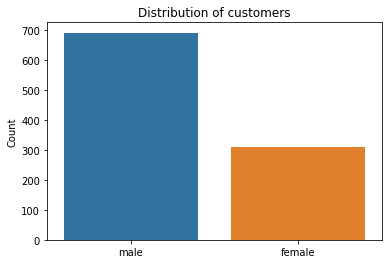

In [68]:
def graph_sex():
  sns.barplot(data = df, x = values_sex.index, y = values_sex.values)
  plt.ylabel('Count')
  plt.title('Distribution of customers')
  plt.show()

graph_sex()

So, most of the customers are male customers.




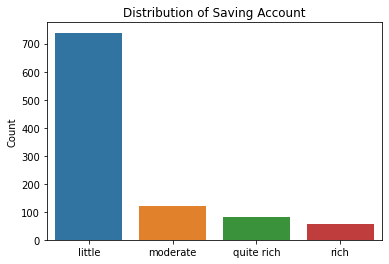

In [74]:
def graph_saving():
  sns.barplot(data = df, x = values_saving.index, y = values_saving.values)
  plt.ylabel('Count')
  plt.title('Distribution of Saving Account')
  plt.show()

graph_saving()  

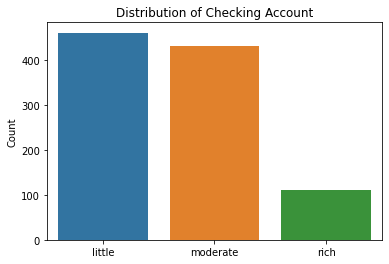

In [75]:
def graph_checking():
  sns.barplot(data = df, x = values_checking.index, y = values_checking.values)
  plt.ylabel('Count')
  plt.title('Distribution of Checking Account')
  plt.show()

graph_checking()

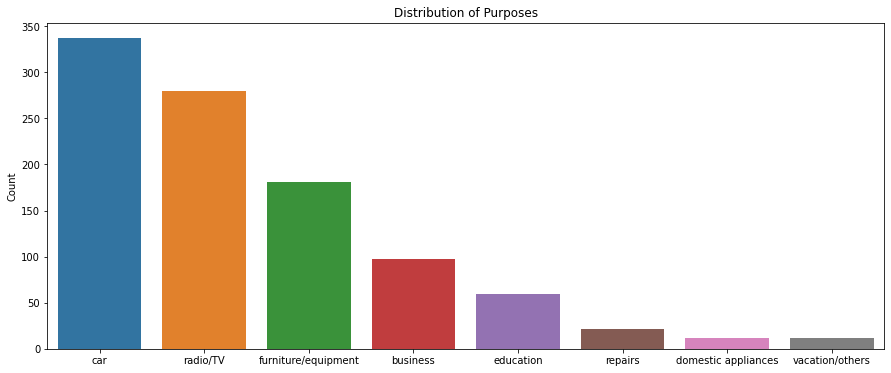

In [80]:
plt.rcParams['figure.figsize'] = (15,6)
def graph_purpose():
  sns.barplot(data = df, x = values_purpose.index, y = values_purpose.values)
  plt.ylabel('Count')
  plt.title('Distribution of Purposes')
  plt.show()

graph_purpose()

Let's see now the distribution of each age

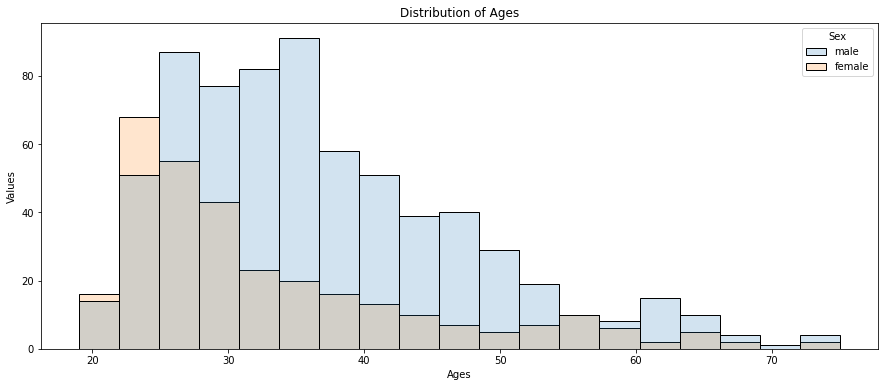

In [97]:
def age_plot():
  sns.histplot(data = df, x = df['Age'], hue = df['Sex'],alpha = 0.2)
  plt.xlabel('Ages')
  plt.ylabel('Values')
  plt.title('Distribution of Ages')
  plt.show()

age_plot()

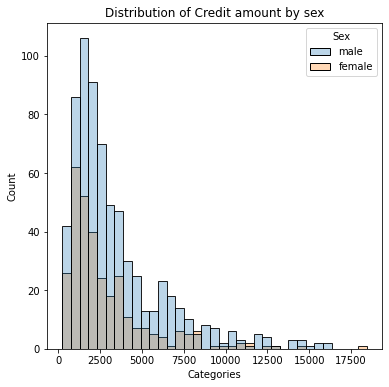

In [127]:
plt.rcParams['figure.figsize'] = (6,6)

def check_sex():
  sns.histplot(data = df, x = df['Credit amount'], hue = df['Sex'], alpha = 0.3)
  plt.xlabel('Categories')
  plt.ylabel('Count')
  plt.title('Distribution of Credit amount by sex')
  plt.show()

check_sex()  

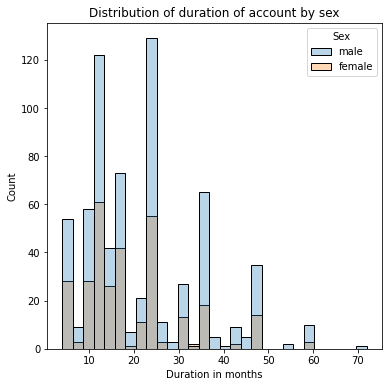

In [129]:
def hist_duration():
  sns.histplot(data = df, x = df['Duration'], hue = df['Sex'], alpha = 0.3)
  plt.xlabel('Duration in months')
  plt.ylabel('Count')
  plt.title('Distribution of duration of account by sex')
  plt.show()
hist_duration()  